# Test functionality of detrend='linear' in xrft's dft()

In [1]:
import numpy as np
import xrft

In [2]:
xrft.__version__

'0.2.2+1.g8b7e84e'

In [3]:
import xarray as xr
xr.set_options(display_style='text') 

In [4]:
from intake import open_catalog

cat = open_catalog("https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/ocean/CESM_POP.yaml")
ds  = cat["CESM_POP_hires_control"].to_dask()

## Define Gulf Stream region: 

- nlon=slice(300,800), nlat=slice(1400,1800)

In [5]:
time_max = 20

In [6]:
T = ds.SST.isel(time=slice(0,time_max),nlon=slice(300,800),nlat=slice(1400,1800))

In [6]:
T

<xarray.DataArray 'SST' (time: 20, nlat: 400, nlon: 500)>
dask.array<getitem, shape=(20, 400, 500), dtype=float32, chunksize=(1, 400, 500), chunktype=numpy.ndarray>
Coordinates:
    ANGLE               (nlat, nlon) float64 dask.array<chunksize=(400, 500), meta=np.ndarray>
    ANGLET              (nlat, nlon) float64 dask.array<chunksize=(400, 500), meta=np.ndarray>
    DXT                 (nlat, nlon) float64 dask.array<chunksize=(400, 500), meta=np.ndarray>
    DXU                 (nlat, nlon) float64 dask.array<chunksize=(400, 500), meta=np.ndarray>
    DYT                 (nlat, nlon) float64 dask.array<chunksize=(400, 500), meta=np.ndarray>
    DYU                 (nlat, nlon) float64 dask.array<chunksize=(400, 500), meta=np.ndarray>
    HT                  (nlat, nlon) float64 dask.array<chunksize=(400, 500), meta=np.ndarray>
    HTE                 (nlat, nlon) float64 dask.array<chunksize=(400, 500), meta=np.ndarray>
    HTN                 (nlat, nlon) float64 dask.array<chunksize=(400, 500), meta=np.ndarray>
    HU                  (nlat, nlon) float64 dask.array<chunksize=(400, 500), meta=np.ndarray>
    HUS                 (nlat, nlon) float64 dask.array<chunksize=(400, 500), meta=np.ndarray>
    HUW                 (nlat, nlon) float64 dask.array<chunksize=(400, 500), meta=np.ndarray>
    KMT                 (nlat, nlon) float64 dask.array<chunksize=(400, 500), meta=np.ndarray>
    KMU                 (nlat, nlon) float64 dask.array<chunksize=(400, 500), meta=np.ndarray>
    REGION_MASK         (nlat, nlon) float64 dask.array<chunksize=(400, 500), meta=np.ndarray>
    T0_Kelvin           float64 ...
    TAREA               (nlat, nlon) float64 dask.array<chunksize=(400, 500), meta=np.ndarray>
    TLAT                (nlat, nlon) float64 dask.array<chunksize=(400, 500), meta=np.ndarray>
    TLONG               (nlat, nlon) float64 dask.array<chunksize=(400, 500), meta=np.ndarray>
    UAREA               (nlat, nlon) float64 dask.array<chunksize=(400, 500), meta=np.ndarray>
    ULAT                (nlat, nlon) float64 dask.array<chunksize=(400, 500), meta=np.ndarray>
    ULONG               (nlat, nlon) float64 dask.array<chunksize=(400, 500), meta=np.ndarray>
    cp_air              float64 ...
    cp_sw               float64 ...
    days_in_norm_year   timedelta64[ns] ...
    fwflux_factor       float64 ...
    grav                float64 ...
    heat_to_PW          float64 ...
    hflux_factor        float64 ...
    latent_heat_fusion  float64 ...
    latent_heat_vapor   float64 ...
    mass_to_Sv          float64 ...
    momentum_factor     float64 ...
    nsurface_t          float64 ...
    nsurface_u          float64 ...
    ocn_ref_salinity    float64 ...
    omega               float64 ...
    ppt_to_salt         float64 ...
    radius              float64 ...
    rho_air             float64 ...
    rho_fw              float64 ...
    rho_sw              float64 ...
    salinity_factor     float64 ...
    salt_to_Svppt       float64 ...
    salt_to_mmday       float64 ...
    salt_to_ppt         float64 ...
    sea_ice_salinity    float64 ...
    sflux_factor        float64 ...
    sound               float64 ...
    stefan_boltzmann    float64 ...
  * time                (time) object 0046-01-02 00:00:00 ... 0046-01-21 00:0...
    vonkar              float64 ...
Dimensions without coordinates: nlat, nlon
Attributes:
    cell_methods:  time: mean
    grid_loc:      2110
    long_name:     Surface Potential Temperature
    units:         degC

## Define FFT function: real FFT, window, detrend='constant'

In [7]:
def take_FFT(var,real_arg):
    var = var.assign_coords(time=np.arange(var.time.size))
    var = var.chunk({'time':None})
    
    var_hat = xrft.dft(var,dim=['time'],real=real_arg,window=True,detrend='constant')
    
    return var_hat

In [9]:
%%time
That = take_FFT(T,'time')
#That

CPU times: user 375 ms, sys: 29.7 ms, total: 405 ms
Wall time: 3.46 s


In [11]:
%%time
T_fft_const = That.load()

CPU times: user 428 µs, sys: 0 ns, total: 428 µs
Wall time: 440 µs


/srv/conda/envs/notebook/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


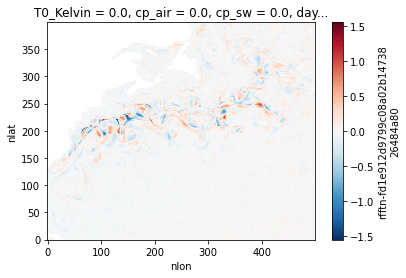

In [12]:
T_fft_const.real.mean('freq_time').plot()

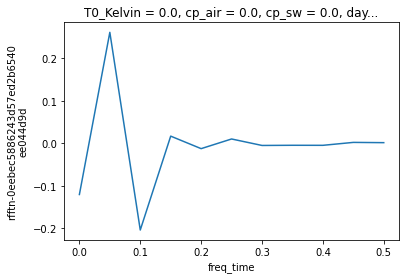

In [24]:
T_fft_const.real.mean(['nlon','nlat']).plot()

## Define FFT function: real FFT, window, detrend='None'

In [13]:
def take_FFT(var,real_arg):
    var = var.assign_coords(time=np.arange(var.time.size))
    var = var.chunk({'time':None})
    
    var_hat = xrft.dft(var,dim=['time'],real=real_arg,window=True,detrend=None) 
    
    return var_hat

In [14]:
%%time
That = take_FFT(T,'time')

CPU times: user 329 ms, sys: 40.3 ms, total: 369 ms
Wall time: 4.53 s


In [15]:
%%time
T_fft_None = That.load()

CPU times: user 7.47 s, sys: 3.55 s, total: 11 s
Wall time: 5.9 s


/srv/conda/envs/notebook/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


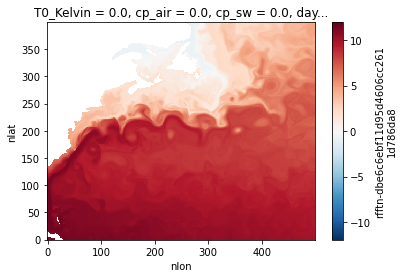

In [16]:
T_fft_None.real.mean('freq_time').plot()

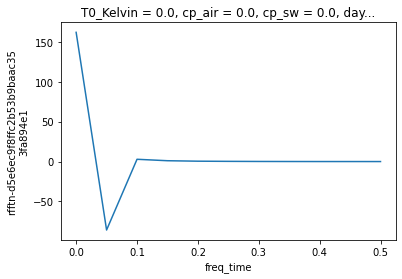

In [20]:
T_fft_None.real.mean(['nlon','nlat']).plot()

## Define FFT function: real FFT, window, detrend='linear'

In [30]:
def take_FFT(var,real_arg):
    var = var.assign_coords(time=np.arange(var.time.size))
    var = var.chunk({'time':None})
    
    var_hat = xrft.dft(var,dim=['time'],real=real_arg,window=True,detrend='linear') 
    
    return var_hat

In [31]:
%%time
That = take_FFT(T,'time')

CPU times: user 1min 14s, sys: 6.11 s, total: 1min 21s
Wall time: 1min 25s


%%time
T_fft_lin = That.load() # runs for ~15 minutes and then kills kernel with no error message

### Try with dask

In [32]:
from dask_gateway import Gateway
gateway = Gateway()
options = gateway.cluster_options()
options.worker_memory = 20
cluster = gateway.new_cluster(options)
cluster.adapt(minimum=1, maximum=20)

In [34]:
from dask.distributed import Client
client = Client(cluster)
client

Client Scheduler: gateway://traefik-gcp-uscentral1b-prod-dask-gateway.prod:80/prod.d9c18aded0ee4bef96d62bba92b53d36 Dashboard: /services/dask-gateway/clusters/prod.d9c18aded0ee4bef96d62bba92b53d36/status,Cluster Workers: 1 Cores: 2 Memory: 21.47 GB


In [39]:
client.close()
cluster.close()

distributed.client - ERROR - Failed to reconnect to scheduler after 10.00 seconds, closing client
_GatheringFuture exception was never retrieved
future: <_GatheringFuture finished exception=CancelledError()>
concurrent.futures._base.CancelledError


In [35]:
%%time
T_fft_lin = That.load()


KeyboardInterrupt



Ran for over 10 minutes with no obvious dask computation running